# Ensemble Models in Scikit Learn

In [246]:
import sklearn

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

https://www.kaggle.com/itsmesunil/bank-loan-modelling

1.ID - customer's ID

2.Age - customer's age in completed years

3.Experience - years of professional experience

4.Income - annual income of the customer ($000)

5.ZIP Code - home address zip code

6.Family - family size of the customers

7.CCAvg - avg. spending on credit cards per month ($000)

8.Education - Education level 1: Undergrad, 2:Graduate, 3:Advanced/Professional

9.Mortgage - Value of house mortgage if any ($000)

10.Personal Loan - Did this customer accept the personal loan offered in the last campaign?

11.Securities Account - Does the customer have a securities account with the bank?

12.CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

13.Online - Does the customer use internet banking facilities?

14.CreditCard - Does the customer use a credit card issued by UniversalBank?

# Bank Data

In [2]:
bank_data = pd.read_csv('datasets/bank_data.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [3]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
bank_data.shape

(480, 14)

In [6]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,240.500000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,138.708327,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,1.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,120.750000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,240.500000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,360.250000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,480.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [8]:
bank_data = bank_data.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis=1)

In [9]:
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 480 non-null    int64
 1   Income              480 non-null    int64
 2   Family              480 non-null    int64
 3   Education           480 non-null    int64
 4   Mortgage            480 non-null    int64
 5   Securities Account  480 non-null    int64
 6   CD Account          480 non-null    int64
 7   Online              480 non-null    int64
 8   CreditCard          480 non-null    int64
dtypes: int64(9)
memory usage: 33.9 KB


In [12]:
bank_data.apply(lambda x: len(x.unique()))

Age                    40
Income                102
Family                  4
Education               3
Mortgage              141
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [11]:
bank_data.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


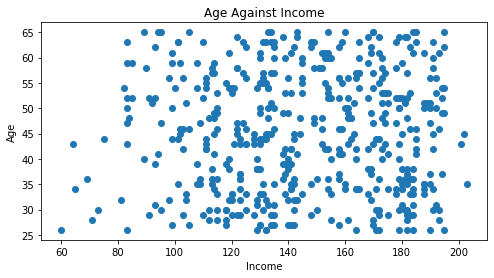

In [24]:
fig, ax = plt.subplots(figsize=(8,4))

plt.scatter( bank_data['Income'], bank_data['Age'])
plt.title("Age Against Income")
plt.xlabel('Income')
ax = plt.ylabel('Age')



No observable relationship between age and income

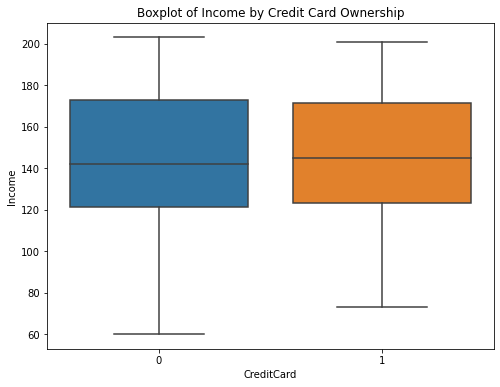

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
x = bank_data['CreditCard']
y = bank_data['Income']
plt.title("Boxplot of Income by Credit Card Ownership")
ax = sns.boxplot(x = x, y = y)

Average income for those with and without a credit card is similar

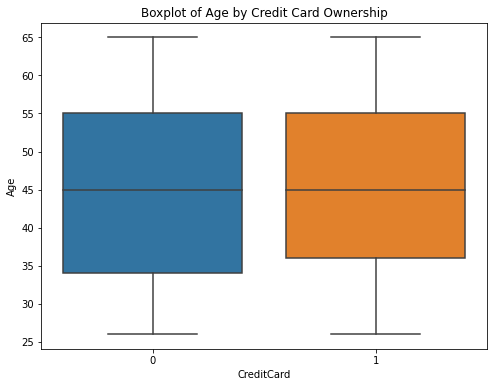

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
x = bank_data['CreditCard']
y = bank_data['Age']
plt.title("Boxplot of Age by Credit Card Ownership")
ax = sns.boxplot(x = x, y = y)

Average age for those with and without a credit card is similar

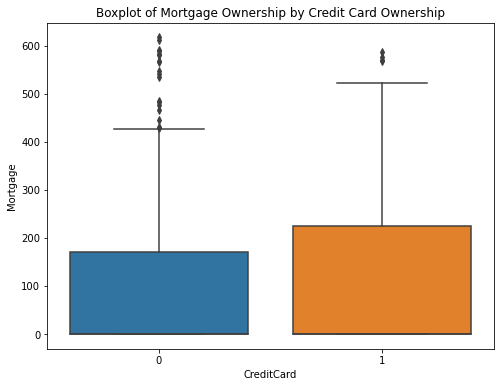

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
x = bank_data['CreditCard']
y = bank_data['Mortgage']
plt.title("Boxplot of Mortgage Ownership by Credit Card Ownership")
ax = sns.boxplot(x = x, y = y)

More mortgage outliers for those without a credit card but with a mortgage

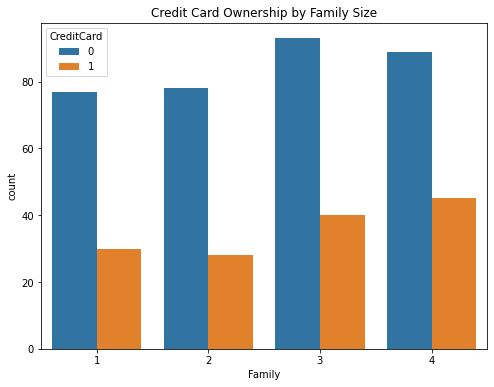

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='Family', data = bank_data, hue = 'CreditCard')
ax = plt.title("Credit Card Ownership by Family Size")

Most people do not have a credit card but of those who do, the number increases with the size of family

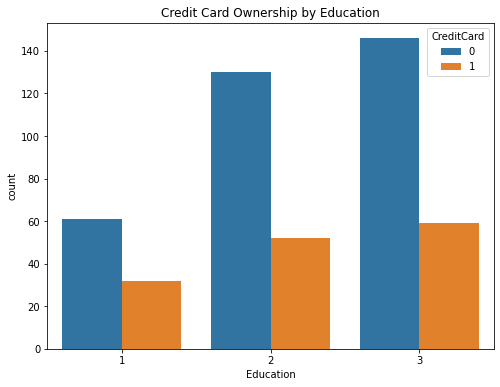

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Education', data = bank_data, hue = 'CreditCard')
ax = plt.title("Credit Card Ownership by Education")

More higher educated people tend to have a credit card

In [31]:
pd.crosstab(bank_data['Securities Account'], bank_data['CreditCard'])

CreditCard,0,1
Securities Account,,
0,294,126
1,43,17


Those without a credit card also tend to not have a securities account

In [32]:
bank_data_corr = bank_data.corr()
bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.021260,-0.001712,-0.009196,0.041622,-0.008705,0.053308,0.028577,0.026542
Income,0.021260,1.000000,-0.020876,0.122170,0.189672,-0.053058,0.069669,0.075136,0.013477
Family,-0.001712,-0.020876,1.000000,-0.239996,0.070556,-0.106005,-0.003085,-0.039178,0.050746
Education,-0.009196,0.122170,-0.239996,1.000000,-0.026044,-0.041852,-0.071054,0.000567,-0.038536
Mortgage,0.041622,0.189672,0.070556,-0.026044,1.000000,-0.016809,0.084738,0.063899,0.039181
Securities Account,-0.008705,-0.053058,-0.106005,-0.041852,-0.016809,1.000000,0.464282,0.059631,-0.012052
CD Account,0.053308,0.069669,-0.003085,-0.071054,0.084738,0.464282,1.000000,0.385804,0.514046
Online,0.028577,0.075136,-0.039178,0.000567,0.063899,0.059631,0.385804,1.000000,-0.043762
CreditCard,0.026542,0.013477,0.050746,-0.038536,0.039181,-0.012052,0.514046,-0.043762,1.000000


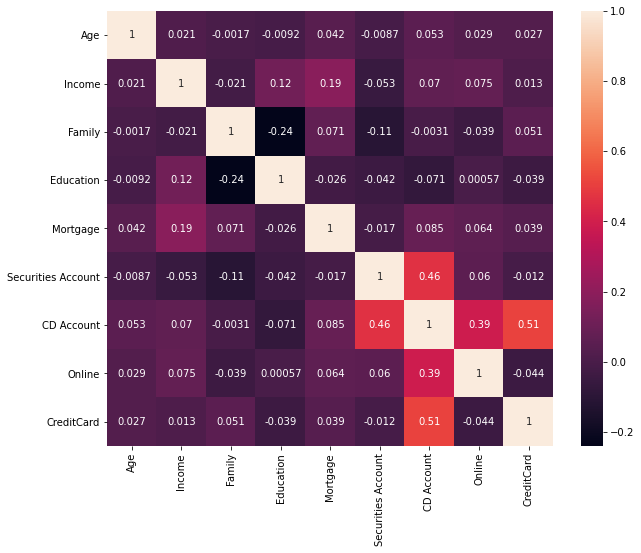

In [33]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(bank_data_corr, annot=True)

The highest correlation with credit card ownership is whether the customer has a CD account

In [39]:
X = bank_data.drop('CreditCard', axis=1)
y = bank_data['CreditCard']

In [40]:
X.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online
0,34,180,1,3,0,0,0,0
1,38,130,4,3,134,0,0,0
2,46,193,2,3,0,0,0,0
3,38,119,1,2,0,0,1,1
4,42,141,3,3,0,1,1,1


In [42]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: CreditCard, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(384, 8) (384,) (96, 8) (96,)


In [77]:
log_clf = LogisticRegression(C=1, solver='liblinear')
svc_clf = SVC(C=1, kernel='linear', gamma='auto', probability = True)
naive_clf = GaussianNB()

In [78]:
for clf in (log_clf, svc_clf, naive_clf):
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8645833333333334
SVC 0.8541666666666666
GaussianNB 0.8229166666666666


## Hard Voting - majority vote

In [79]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf), 
                                               ('naive', naive_clf)],
                                   voting='hard')

In [80]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('svc',
                              SVC(C=1, gamma='auto', kernel='linear',
                                  probability=True)),
                             ('naive', GaussianNB())])

In [81]:
y_pred = voting_clf_hard.predict(x_test)

In [82]:
accuracy_score(y_test, y_pred)

0.8645833333333334

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        73
           1       0.78      0.61      0.68        23

    accuracy                           0.86        96
   macro avg       0.83      0.78      0.80        96
weighted avg       0.86      0.86      0.86        96



In [84]:
print(confusion_matrix(y_test, y_pred))

[[69  4]
 [ 9 14]]


In [85]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8645833333333334
SVC 0.8541666666666666
GaussianNB 0.8229166666666666
VotingClassifier 0.8645833333333334


## Soft Voting - using probabilities

In [86]:
y_pred_probs = log_clf.predict_proba(x_test)
y_pred_probs[:10]

array([[0.67073849, 0.32926151],
       [0.72795137, 0.27204863],
       [0.71477679, 0.28522321],
       [0.6830311 , 0.3169689 ],
       [0.21816629, 0.78183371],
       [0.95453243, 0.04546757],
       [0.65940024, 0.34059976],
       [0.72374618, 0.27625382],
       [0.71617871, 0.28382129],
       [0.94838828, 0.05161172]])

In [87]:
y_pred_probs = naive_clf.predict_proba(x_test)
y_pred_probs[:10]

array([[0.9060513 , 0.0939487 ],
       [0.79686173, 0.20313827],
       [0.89546957, 0.10453043],
       [0.87900941, 0.12099059],
       [0.08249232, 0.91750768],
       [0.92705195, 0.07294805],
       [0.82399444, 0.17600556],
       [0.86670782, 0.13329218],
       [0.87942877, 0.12057123],
       [0.88238016, 0.11761984]])

In [89]:
y_pred_probs = svc_clf.predict_proba(x_test)
y_pred_probs[:10]

array([[0.79283395, 0.20716605],
       [0.79283464, 0.20716536],
       [0.79284705, 0.20715295],
       [0.79284998, 0.20715002],
       [0.12975023, 0.87024977],
       [0.89595214, 0.10404786],
       [0.79289115, 0.20710885],
       [0.79290714, 0.20709286],
       [0.79279071, 0.20720929],
       [0.89597076, 0.10402924]])

Soft voting classifier (voting='soft') predict the class with the highest class probability, averaged over all the individual classifiers. 


In [90]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), 
                                               ('svc', svc_clf_soft), 
                                               ('naive', naive_clf)],
                                   voting='soft', 
                                   weights = [0.40, 0.30, 0.30])

In [91]:
for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8645833333333334
SVC 0.8541666666666666
GaussianNB 0.8229166666666666
VotingClassifier 0.8645833333333334


## Bagging and Pasting

Source: https://www.kaggle.com/maajdl/yeh-concret-data

Cement -  kg in a m3 mixture [m3 - meter cubic]  
Blast Furnace Slag - kg in a m3 mixture  
Fly Ash - kg in a m3 mixture   
Water - kg in a m3 mixture  
Superplasticizer - kg in a m3 mixture  
Coarse Aggregate - kg in a m3 mixture   
Fine Aggregate - kg in a m3 mixture   
Age - Day (1~365)   
Concrete compressive strength - MPa [Megapascal (MPa) is a measure of the compressive strength of concrete. It lets                                        inspectors know how much pressure can be applied to the concrete before it cracks or fails]

In [92]:
concrete_data = pd.read_csv('datasets/concrete_data.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [93]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [96]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


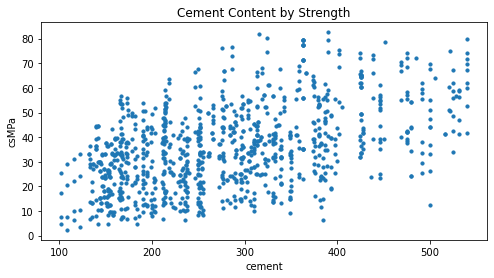

In [103]:
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(concrete_data['cement'], concrete_data['csMPa'], s = 10)
plt.title("Cement Content by Strength")
plt.xlabel('cement')
ax = plt.ylabel('csMPa')

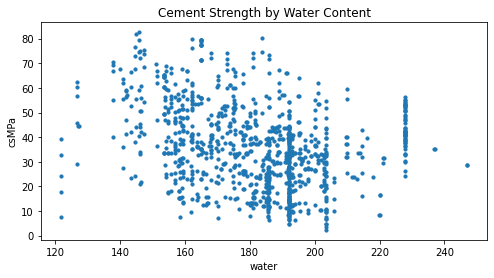

In [107]:
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(concrete_data['water'], concrete_data['csMPa'], s= 10)
plt.title("Cement Strength by Water Content")
plt.xlabel('water')
ax = plt.ylabel('csMPa')

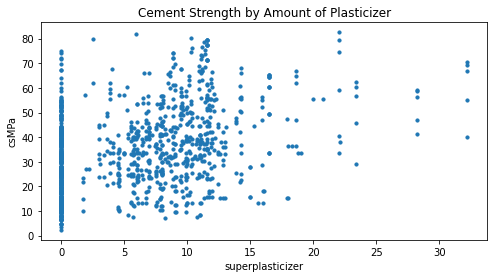

In [113]:
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(concrete_data['superplasticizer'], concrete_data['csMPa'], s = 10)
plt.title("Cement Strength by Amount of Plasticizer")
plt.xlabel('superplasticizer')
ax = plt.ylabel('csMPa')

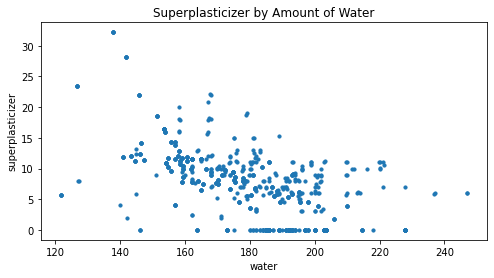

In [120]:
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(concrete_data['water'], concrete_data['superplasticizer'], s = 10)
plt.title("Superplasticizer by Amount of Water")
plt.xlabel('water')
ax = plt.ylabel('superplasticizer')

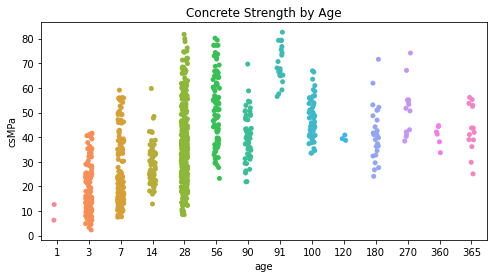

In [118]:
# Striplot is like scatter plot for categorical data
fig, ax = plt.subplots(figsize=(8,4))
sns.stripplot(x = concrete_data['age'], y = concrete_data['csMPa'])
ax = plt.title("Concrete Strength by Age")

In [121]:
concrete_data_corr = concrete_data.corr()
concrete_data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


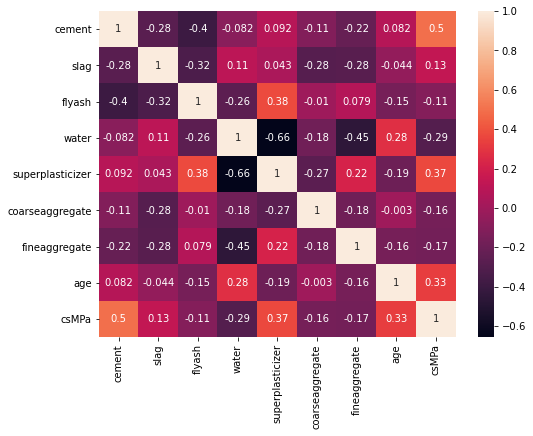

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(concrete_data_corr, annot=True)

The age and amount of superplasticizer is positively correlated with the strength of concrete. The amount of water is negatively correlated with the strength.

In [125]:
X = concrete_data.drop('csMPa', axis=1)
Y = concrete_data['csMPa']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Pasting - without replacement

Trains on different subsets of the training data

In [126]:
# Bootstrap = False. Max samples = 1 means all samples are used
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = False,
                           max_samples = 1.0,
                           n_jobs = -1)

In [127]:
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [128]:
y_pred = bag_reg.predict(x_test)

In [129]:
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

df.sample(10)

,Actual,Predicted
732,9.01,17.62282
232,50.77,53.90000
674,13.57,11.41000
89,39.30,34.79524
842,15.57,15.57000
846,65.91,65.91000
243,40.86,35.34000
19,42.62,42.23000
618,26.94,27.63000
247,39.59,36.40416


In [132]:
r2_score(y_test, y_pred)

0.8785978411084701

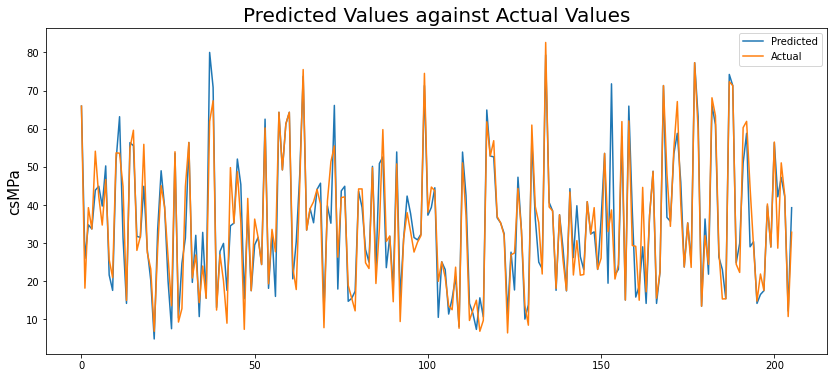

In [135]:
plt.figure(figsize = (14,6))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('csMPa', fontsize=15)
plt.title("Predicted Values against Actual Values", fontsize = 20)
plt.legend()
plt.show()

## Bagging - with replacement

So 63% of the training instances are sampled on average for each predictor. By setting oob_score=True we are doing an automatic evaluation after training using the remaining 37% of the training instance which is not sampled and this data is called out-of-bags(oob).

In [136]:
# Here max samples is 0.8. Bootstrap = True means there is replacement. Out of bag evaluation = True then after training each
## predictor, those not used during training are used to evaluate the predictor.
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators = 500,
                           bootstrap = True,
                           max_samples = 0.8,
                           n_jobs = -1,
                           oob_score = True)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [137]:
bag_reg.oob_score_

0.9056156381214339

In [138]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.9259414664051738

## Random Subspaces

In [139]:
# All the samples are used for each predictor. Each only trained with a fraction of the features (bootstrap features = True).
## Max features is 0.8
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=False,
                           max_samples=1.0,
                           bootstrap_features=True,
                           max_features=0.8,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 bootstrap_features=True, max_features=0.8, n_estimators=500,
                 n_jobs=-1)

In [140]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.8326537524477717

# Classification Model Using Pasting, Bagging and Random Patches 

## Pasting

In [142]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [144]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 1.0,
                            n_jobs = -1)

In [145]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=400, n_jobs=-1)

In [146]:
y_pred = bag_clf.predict(x_test)

In [147]:
accuracy_score(y_test, y_pred)

0.7291666666666666

## Bagging

In [149]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True)

bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                  n_estimators=400, n_jobs=-1, oob_score=True)

In [150]:
bag_clf.oob_score_

0.7838541666666666

In [151]:
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8020833333333334

## Random Patches

Use sample of features AND samples to train predictors. Max samples is a number not proportion here

In [152]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 400,
                            bootstrap = False,
                            max_samples = 100,
                            bootstrap_features = True,
                            max_features = 0.8,
                            n_jobs = -1)

bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  bootstrap_features=True, max_features=0.8, max_samples=100,
                  n_estimators=400, n_jobs=-1)

In [153]:
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.7916666666666666

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        69
           1       0.68      0.48      0.57        27

    accuracy                           0.79        96
   macro avg       0.75      0.70      0.71        96
weighted avg       0.78      0.79      0.78        96



# Random Forest Regressor

Equivalent to the Decision Tree Regressor and the Bagging Regressor

In [157]:
X = concrete_data.drop('csMPa', axis=1)
Y = concrete_data['csMPa']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [158]:
rnd_reg = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
rnd_reg.fit(x_train, y_train)

RandomForestRegressor(max_leaf_nodes=12, n_estimators=600, n_jobs=-1)

In [159]:
y_pred = rnd_reg.predict(x_test)
r2_score(y_test, y_pred)

0.7252321238234951

In [160]:
important_features = pd.Series(rnd_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.387356
cement              0.378992
water               0.120647
slag                0.062348
superplasticizer    0.036105
flyash              0.006522
fineaggregate       0.004259
coarseaggregate     0.003771
dtype: float64

## Bagging Regressor (same as the Random Forest)

In [161]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(splitter='random', max_leaf_nodes=12), 
                                                 n_estimators=600,
                                                 bootstrap=True,
                                                 max_samples=1.0,
                                                 n_jobs=-1)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes=12,
                                                      splitter='random'),
                 n_estimators=600, n_jobs=-1)

In [162]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.686197921987159

The score is lower so the random forest did better - maybe due to extra randomness

## Extra Trees Regressor

Use randomness in the splitting threshold

In [164]:
extra_reg = ExtraTreesRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
extra_reg.fit(x_train, y_train)

ExtraTreesRegressor(max_leaf_nodes=12, n_estimators=600, n_jobs=-1)

In [165]:
y_pred = extra_reg.predict(x_test)

r2_score(y_test, y_pred)

0.6881220714943002

In [166]:
important_features = pd.Series(extra_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.366174
cement              0.328453
water               0.098749
superplasticizer    0.096260
slag                0.052607
flyash              0.035432
fineaggregate       0.015598
coarseaggregate     0.006727
dtype: float64

# Random Forest Classification

In [174]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [175]:
rnd_clf = RandomForestClassifier(n_estimators = 400,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=400, n_jobs=-1)

In [176]:
y_pred = rnd_clf.predict(x_test)

In [177]:
accuracy_score(y_test, y_pred)

0.7395833333333334

In [178]:
important_features = pd.Series(rnd_clf.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

CD Account            0.446723
Income                0.148009
Age                   0.131882
Mortgage              0.076271
Online                0.060283
Securities Account    0.053946
Family                0.048380
Education             0.034506
dtype: float64

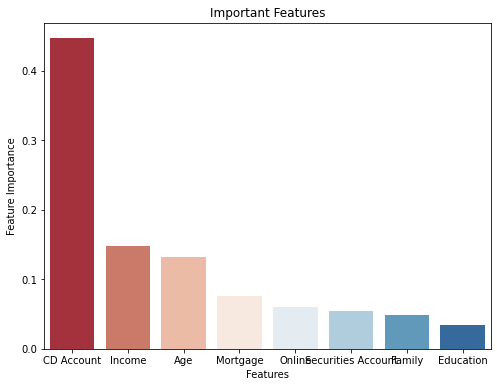

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

# Bagging Classifier (same as the Random Forest)

In [181]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter ='random', max_leaf_nodes=12), 
                                                   n_estimators = 400, 
                                                   max_samples = 1.0,
                                                   bootstrap = True,
                                                   n_jobs = -1)

bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=12,
                                                        splitter='random'),
                  n_estimators=400, n_jobs=-1)

In [182]:
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8125

## Extra Trees Classifier

In [184]:
extra_clf = ExtraTreesClassifier(n_estimators = 600,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

extra_clf.fit(x_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=600, n_jobs=-1)

In [185]:
y_pred = extra_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.7916666666666666

# Adaboost Methods

## Regressor

Adaptive boosting - use a series of sequential learners in an ensemble with each learning from the previous. A lower learning rate will require more estimators.

In [189]:
X = concrete_data.drop('csMPa', axis=1)
Y = concrete_data['csMPa']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [190]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                            n_estimators=100, 
                            learning_rate=1.0)

ada_reg.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100)

In [191]:
ada_reg.estimator_weights_

array([1.62306663, 1.43780557, 1.24552712, 0.86806971, 0.96804016,
       0.95485625, 1.62100186, 0.85045487, 1.01841518, 1.26505436,
       1.04302603, 0.76822086, 0.99645456, 0.77165366, 1.31345188,
       0.63476023, 1.03782433, 1.11650448, 1.1869039 , 0.94332339,
       0.77807874, 1.49389466, 0.6844851 , 1.02202663, 0.81773923,
       0.62916045, 1.05321798, 0.78853586, 1.07909684, 1.02766496,
       0.37349713, 0.74496257, 0.88195605, 1.13469198, 1.49343249,
       0.81029755, 1.23606056, 0.74234392, 0.70203649, 1.07751455,
       0.48299529, 0.93934159, 0.42814029, 0.86034207, 0.64668982,
       0.41230037, 0.4995678 , 0.63420118, 0.42717326, 0.93460734,
       0.9442368 , 0.66656473, 0.79283541, 0.40853214, 0.89387754,
       0.47159989, 0.33950426, 0.40731596, 0.9608124 , 1.06854988,
       1.07268469, 0.43146235, 0.87807855, 0.53066818, 0.41412051,
       0.66306672, 0.61155584, 0.79782915, 1.03929326, 0.83446141,
       1.07325736, 0.80166814, 0.63416407, 0.63956753, 0.89488

In [192]:
y_pred = ada_reg.predict(x_test)

In [193]:
r2_score(y_test, y_pred)

0.8697519166713329

## Adaboost with regularization

In [194]:
# Increased estimators, reduced learning rate (the contribution of each learner halved), changed the depth of the decision trees.
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), 
                            n_estimators=200, 
                            learning_rate=0.5)

ada_reg.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.5, n_estimators=200)

In [195]:
ada_reg.estimator_weights_

array([0.62513431, 0.60059148, 0.56585782, 0.48867139, 0.47030362,
       0.47924805, 0.4197039 , 0.38217332, 0.48130746, 0.27593654,
       0.35427559, 0.36025595, 0.49201604, 0.45961371, 0.33393095,
       0.39157937, 0.28570243, 0.48427963, 0.47422629, 0.31896099,
       0.44376124, 0.48909067, 0.22779327, 0.36358909, 0.24296893,
       0.51593013, 0.37491415, 0.34627966, 0.41569214, 0.43994729,
       0.32176668, 0.33663572, 0.47985862, 0.30549657, 0.4320351 ,
       0.24249951, 0.40726012, 0.29987041, 0.22305985, 0.35976211,
       0.59498983, 0.38335978, 0.48259228, 0.31310602, 0.27089906,
       0.48319962, 0.36518116, 0.42245417, 0.24031991, 0.17753465,
       0.28360336, 0.57474705, 0.42154784, 0.15547435, 0.30076781,
       0.25388574, 0.39626722, 0.28779303, 0.26296709, 0.37793151,
       0.11407872, 0.53052365, 0.51761296, 0.41360732, 0.38505488,
       0.29866469, 0.33994959, 0.12785166, 0.36212986, 0.18906884,
       0.32931001, 0.41495175, 0.35783998, 0.30177282, 0.17089

In [196]:
y_pred = ada_reg.predict(x_test)

In [197]:
r2_score(y_test, y_pred)

0.7337714159576629

# Adaboost Classification

In [200]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [201]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=100, 
                             algorithm='SAMME', 
                             learning_rate=1.0)

ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [202]:
ada_clf.estimator_weights_

array([1.38304233, 0.96034308, 0.54334618, 0.38853293, 0.55495404,
       0.36588108, 0.25147373, 0.24952412, 0.41309928, 0.34769176,
       0.23251595, 0.15262046, 0.21330919, 0.33517301, 0.18231437,
       0.19317665, 0.24272204, 0.12254963, 0.18236013, 0.107523  ,
       0.09809599, 0.19932572, 0.2481002 , 0.07002702, 0.07884487,
       0.19765892, 0.1321831 , 0.21328385, 0.23372731, 0.11772332,
       0.08184505, 0.08738885, 0.08073683, 0.14178294, 0.14518875,
       0.05809483, 0.02343474, 0.02316331, 0.0228981 , 0.0226389 ,
       0.0223855 , 0.0221377 , 0.02189534, 0.07607159, 0.10991895,
       0.16619412, 0.15201992, 0.06774957, 0.02174158, 0.02150776,
       0.02127892, 0.0210549 , 0.02083555, 0.02062072, 0.02041028,
       0.02020408, 0.02012361, 0.01992314, 0.02000603, 0.07076644,
       0.06650315, 0.01987356, 0.02041416, 0.02020789, 0.02000575,
       0.01980761, 0.01968598, 0.01949409, 0.01961712, 0.01942657,
       0.01930959, 0.01912494, 0.01924323, 0.01905984, 0.01894

In [203]:
y_pred = ada_clf.predict(x_test)

In [204]:
accuracy_score(y_test, y_pred)

0.8645833333333334

In [205]:
# max depth = 1 is known as decision stumps
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=100, 
                             algorithm='SAMME.R', 
                             learning_rate=0.5)

ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100)

In [206]:
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8229166666666666

# Gradient Boosting

## Regressor - Each Learner Results fed to the Next

In [210]:
X = concrete_data.drop('csMPa', axis=1)
Y = concrete_data['csMPa']

In [211]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [212]:
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [213]:
y2 = y_train - tree_reg1.predict(x_train)

y2[:10]

397     2.963654
832    -6.206346
975     3.184894
1029   -7.995106
87      8.773551
698     1.284894
776     5.533551
248     3.904894
677    -7.946449
121     4.780405
Name: csMPa, dtype: float64

In [214]:
tree_reg2 = DecisionTreeRegressor(max_depth=4)
tree_reg2.fit(x_train, y2)

DecisionTreeRegressor(max_depth=4)

In [215]:
y3 = y2 - tree_reg2.predict(x_train)

y3[:10]

397      5.514879
832     -3.655121
975     -2.021006
1029    -5.443880
87     -10.850943
698      3.836120
776      8.030556
248     12.854491
677     -5.395224
121     -0.425495
Name: csMPa, dtype: float64

In [216]:
tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(x_train, y3)

DecisionTreeRegressor(max_depth=5)

In [217]:
y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [218]:
r2_score(y_test, y_pred)

0.7867844792401982

In [219]:
y4 = y3 - tree_reg3.predict(x_train)

y4[:10]

397     6.198322
832    -2.971678
975    -1.337564
1029   -4.760438
87     -3.606925
698     4.519562
776     6.181489
248     7.845646
677    -7.244290
121     0.257947
Name: csMPa, dtype: float64

In [220]:
tree_reg4 = DecisionTreeRegressor(max_depth=5)
tree_reg4.fit(x_train, y4)

DecisionTreeRegressor(max_depth=5)

In [221]:
y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3, tree_reg4))
r2_score(y_test, y_pred)

0.8280778855036737

## Gradient Boosting

In [223]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)

0.7624334939744566

In [226]:
# Set learning rate to 0.1
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=0.1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)

0.30286191633427006

In [225]:
# Set number of estimators to 30
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=30, learning_rate=0.1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)

0.8449377686325963

## Hyperparameter Tuning of Gradient Boosting

Find the right number of parameters

In [230]:
# Baseline model
X = concrete_data.drop('csMPa', axis=1)
Y = concrete_data['csMPa']
X = X.drop(['flyash', 'coarseaggregate', 'fineaggregate'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
baseline = GradientBoostingRegressor(max_depth=3, n_estimators=50)
baseline.fit(x_train, y_train)
y_pred = baseline.predict(x_test)
r2_score(y_test, y_pred)

0.8526760102042061

In [231]:
important_features = pd.Series(baseline.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.390083
cement              0.330464
water               0.095666
slag                0.093219
superplasticizer    0.090568
dtype: float64

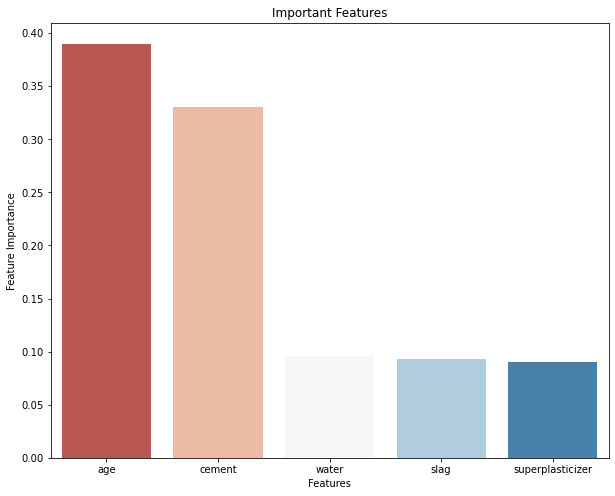

In [232]:
# View important features
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

In [235]:
# Set the range of parameters and gridsearch
gbr = GradientBoostingRegressor(max_depth=3)
parameters = {'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]}
gridsearch_reg = GridSearchCV(estimator=gbr, param_grid=parameters, cv=3)
gridsearch_reg.fit(x_train, y_train)
gridsearch_reg.best_params_

{'n_estimators': 500}

In [237]:
# Shuffle and resplit and use the best parameter of 500 estimators
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
gbr_best = GradientBoostingRegressor(max_depth=3, 
                                n_estimators = gridsearch_reg.best_params_['n_estimators'])

gbr_best.fit(x_train, y_train)
y_pred = gbr_best.predict(x_test)
r2_score(y_test, y_pred)

0.9241283748278447

Add estimators until the model stops improving - use the warm_start = True

In [239]:
gbr = GradientBoostingRegressor(max_depth=3, warm_start=True)

In [240]:
# Run to find the best number of estimators
min_val_error = float("inf")
error_increasing = 0

for n_estimators in range(1, 1000):
    gbr.n_estimators = n_estimators
    gbr.fit(x_train, y_train)
    
    y_pred = gbr.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    print('No. of estimators: ', gbr.n_estimators_)
    print('Validation error: ', val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_increasing = 0
    else:
        error_increasing += 1
        if error_increasing == 10:
            break

No. of estimators:  1
Validation error:  223.24098762230298
No. of estimators:  2
Validation error:  198.3536357012926
No. of estimators:  3
Validation error:  172.6500540029362
No. of estimators:  4
Validation error:  155.07589228951062
No. of estimators:  5
Validation error:  138.0216809759594
No. of estimators:  6
Validation error:  124.98059585414856
No. of estimators:  7
Validation error:  111.7374771413388
No. of estimators:  8
Validation error:  102.37487772390183
No. of estimators:  9
Validation error:  93.36241798337566
No. of estimators:  10
Validation error:  87.21723356750067
No. of estimators:  11
Validation error:  81.49690887391145
No. of estimators:  12
Validation error:  76.5965091857773
No. of estimators:  13
Validation error:  71.26480683614547
No. of estimators:  14
Validation error:  66.12347560092547
No. of estimators:  15
Validation error:  62.948527142088615
No. of estimators:  16
Validation error:  60.29213701867046
No. of estimators:  17
Validation error:  57.

No. of estimators:  143
Validation error:  25.10409133208314
No. of estimators:  144
Validation error:  25.068631086436874
No. of estimators:  145
Validation error:  25.02949913140045
No. of estimators:  146
Validation error:  24.985487384024648
No. of estimators:  147
Validation error:  24.941010486354593
No. of estimators:  148
Validation error:  24.947397419405664
No. of estimators:  149
Validation error:  24.937039131530494
No. of estimators:  150
Validation error:  24.917133131149875
No. of estimators:  151
Validation error:  24.954828087788705
No. of estimators:  152
Validation error:  24.912881621012367
No. of estimators:  153
Validation error:  24.877998714427633
No. of estimators:  154
Validation error:  24.81248840904902
No. of estimators:  155
Validation error:  24.759037614144912
No. of estimators:  156
Validation error:  24.75881147534977
No. of estimators:  157
Validation error:  24.67567997045404
No. of estimators:  158
Validation error:  24.628540573968493
No. of estima

No. of estimators:  284
Validation error:  21.715405906384998
No. of estimators:  285
Validation error:  21.705636608191973
No. of estimators:  286
Validation error:  21.70274954538663
No. of estimators:  287
Validation error:  21.672544692684426
No. of estimators:  288
Validation error:  21.648965021357544
No. of estimators:  289
Validation error:  21.624961235118338
No. of estimators:  290
Validation error:  21.63594677120677
No. of estimators:  291
Validation error:  21.636397132569794
No. of estimators:  292
Validation error:  21.620385976961007
No. of estimators:  293
Validation error:  21.613806886417663
No. of estimators:  294
Validation error:  21.649673388189907
No. of estimators:  295
Validation error:  21.65355317859188
No. of estimators:  296
Validation error:  21.648019238704176
No. of estimators:  297
Validation error:  21.651007455174913
No. of estimators:  298
Validation error:  21.676832916633902
No. of estimators:  299
Validation error:  21.640788874193028
No. of esti

No. of estimators:  424
Validation error:  19.67758165596528
No. of estimators:  425
Validation error:  19.677362714535207
No. of estimators:  426
Validation error:  19.66783209880664
No. of estimators:  427
Validation error:  19.657240530973162
No. of estimators:  428
Validation error:  19.651014598227082
No. of estimators:  429
Validation error:  19.654873349847364
No. of estimators:  430
Validation error:  19.692975548064727
No. of estimators:  431
Validation error:  19.69749058362953
No. of estimators:  432
Validation error:  19.639382653316584
No. of estimators:  433
Validation error:  19.631702146429173
No. of estimators:  434
Validation error:  19.619883734566436
No. of estimators:  435
Validation error:  19.624186524323854
No. of estimators:  436
Validation error:  19.612988035219878
No. of estimators:  437
Validation error:  19.603064505543006
No. of estimators:  438
Validation error:  19.590427965471406
No. of estimators:  439
Validation error:  19.587443091605795
No. of esti

No. of estimators:  574
Validation error:  18.509768517650787
No. of estimators:  575
Validation error:  18.534383802589524
No. of estimators:  576
Validation error:  18.51300601550105
No. of estimators:  577
Validation error:  18.507405789819156
No. of estimators:  578
Validation error:  18.49908748179937


In [241]:
n_estimators

578

In [242]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
gbr_best = GradientBoostingRegressor(max_depth=3,
                                     n_estimators = n_estimators)
gbr_best.fit(x_train, y_train)
y_pred = gbr_best.predict(x_test)
r2_score(y_test, y_pred)

0.9217982259033274

# Stacking

In [243]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

In [244]:
# Split the data
x_train, x_hold_out, x_test  = np.split(X, [int(.7*len(X)), int(.9*len(X))])
y_train, y_hold_out, y_test  = np.split(Y, [int(.7*len(Y)), int(.9*len(Y))])

In [247]:
clf1 = KNeighborsClassifier(n_neighbors=10)
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = GaussianNB()

for clf in (clf1, clf2, clf3):
    clf.fit(x_train, y_train)

In [248]:
def get_predictions(x, y):
    pred_result = pd.DataFrame()
    
    i = 1
    for clf in (clf1, clf2, clf3):

        y_pred = clf.predict(x)
        
        print(clf.__class__.__name__, accuracy_score(y, y_pred))
        
        pred_result.insert(i - 1, 'y_pred_' + str(i), y_pred)
        
        i += 1
        
    return pred_result

In [249]:
pred_result = get_predictions(x_hold_out, y_hold_out)

KNeighborsClassifier 0.7083333333333334
RandomForestClassifier 0.78125
GaussianNB 0.8229166666666666


In [250]:
pred_result.head()

,y_pred_1,y_pred_2,y_pred_3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [251]:
x_stack_train = pred_result
y_stack_train = y_hold_out

In [252]:
clf_stack = LogisticRegression(solver='lbfgs', C=1, max_iter=200)
clf_stack.fit(x_stack_train, y_stack_train)

LogisticRegression(C=1, max_iter=200)

In [253]:
pred_result_test = get_predictions(x_test, y_test)

KNeighborsClassifier 0.6041666666666666
RandomForestClassifier 0.8333333333333334
GaussianNB 0.8541666666666666


In [254]:
x_stack_test = pred_result_test
y_stack_pred = clf_stack.predict(x_stack_test)

In [255]:
accuracy_score(y_stack_pred, y_test)

0.8541666666666666